In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import sys; sys.path.append('..')
from model.began import Generator128
from utils import load_trained_net

In [3]:
g = Generator128(64).to('cuda:0')
g = load_trained_net(g, '../checkpoints/celeba_began.withskips.bs32.cosine.min=0.25.n_cuts=0/gen_ckpt.49.pt')

# Generate images from z_0

In [5]:
import os
os.makedirs('../images/began_generated20', exist_ok=True)

In [8]:
for seed in range(20):
    torch.manual_seed(seed)
    np.random.seed(seed)
    z = torch.randn(64).to('cuda:0').clamp(-1, 1)
    img = g(z).detach().cpu().squeeze(0).clamp(0,1).numpy().transpose([1,2,0])
    img = (img * 255).astype(np.uint8)
    Image.fromarray(img).save(f'../images/began_generated20/gen_from_layer=0_seed={seed}.png')

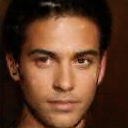

In [9]:
Image.open('../images/began_generated20/gen_from_layer=0_seed=3.png')